In [19]:
import pandas as pd
import pickle

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.model_selection import train_test_split

import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
static_defenses = pd.read_csv("static_defenses_yards.csv",index_col=0)
static_defenses

,id,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine,playResult
0,2018090600:75:1,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,left,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268,10
1,2018090600:146:1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,right,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511,0
2,2018090600:168:1,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,left,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594,0
3,2018090600:190:1,1,0,2,3,1,189.16960,165.05520,26.42,12.91,1,3,1,1,0,0,3,1,3,right,2,5,2,3,-3.11,0,-2,0.000000,0.020120,0.021193,0.020455,3.192871,0.037004,0.036351,6.973569,6.969707,33
5,2018090600:320:1,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,left,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19112,2018123015:3819:17,1,0,3,3,0,169.30945,124.90995,23.43,12.71,1,2,2,1,0,0,2,3,2,right,3,4,3,2,-3.91,0,-2,0.000000,0.017582,0.019208,0.000000,4.867507,0.041344,0.048035,6.970468,6.959971,12
19113,2018123015:3932:17,0,0,1,4,2,327.34785,327.34785,35.76,13.20,1,3,1,1,0,0,2,2,3,right,3,4,3,2,-0.97,0,-2,0.000000,0.016636,0.018979,0.019819,2.120069,0.021384,0.021384,6.987781,6.987781,-3
19114,2018123015:3969:17,0,1,1,4,1,293.39745,293.39745,26.24,14.67,1,3,1,1,0,0,2,1,4,left,3,4,2,3,0.07,-1,-1,0.018878,0.016636,0.019862,0.019789,2.307450,0.023858,0.023858,6.982958,6.982958,0
19115,2018123015:4057:17,0,0,2,3,2,223.81860,223.81860,36.23,11.62,1,3,1,1,0,0,3,2,2,right,3,4,2,3,-0.94,-1,-1,0.000000,0.019526,0.019136,0.020001,2.948817,0.031275,0.031275,6.982128,6.982128,5


In [4]:
static_defenses_ss = pd.read_csv("static_defenses_ss_kmeans_without_outliers.csv",index_col=0)
static_defenses_mms = pd.read_csv("static_defenses_mms_kmeans_without_outliers.csv",index_col=0)
static_defenses_rs = pd.read_csv("static_defenses_rs_kmeans_without_outliers.csv",index_col=0)
static_defenses_pt = pd.read_csv("static_defenses_pt_kmeans_without_outliers.csv",index_col=0)
static_defenses_ss.head()

,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine,cluster
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018090600:75:1,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,1,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268,2
2018090600:146:1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,0,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511,2
2018090600:168:1,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,1,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594,2
2018090600:190:1,1,0,2,3,1,189.16960,165.05520,26.42,12.91,1,3,1,1,0,0,3,1,3,0,2,5,2,3,-3.11,0,-2,0.000000,0.020120,0.021193,0.020455,3.192871,0.037004,0.036351,6.973569,6.969707,0
2018090600:320:1,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,1,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418,0


In [5]:
static_defenses.replace({"right":0,"left":1},inplace=True)

#Añadir playResult

In [6]:
def obtainYards(playId):
    return static_defenses[static_defenses["id"]==playId]["playResult"].values[0]

In [7]:
static_defenses_ss["playResult"] = static_defenses_ss.index.map(obtainYards)
static_defenses_mms["playResult"] = static_defenses_mms.index.map(obtainYards)
static_defenses_rs["playResult"] = static_defenses_rs.index.map(obtainYards)
static_defenses_pt["playResult"] = static_defenses_pt.index.map(obtainYards)

In [8]:
static_defenses_ss

,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine,cluster,playResult
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018090600:75:1,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,1,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268,2,10
2018090600:146:1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,0,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511,2,0
2018090600:168:1,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,1,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594,2,0
2018090600:190:1,1,0,2,3,1,189.16960,165.05520,26.42,12.91,1,3,1,1,0,0,3,1,3,0,2,5,2,3,-3.11,0,-2,0.000000,0.020120,0.021193,0.020455,3.192871,0.037004,0.036351,6.973569,6.969707,0,33
2018090600:320:1,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,1,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018123015:3819:17,1,0,3,3,0,169.30945,124.90995,23.43,12.71,1,2,2,1,0,0,2,3,2,0,3,4,3,2,-3.91,0,-2,0.000000,0.017582,0.019208,0.000000,4.867507,0.041344,0.048035,6.970468,6.959971,0,12
2018123015:3932:17,0,0,1,4,2,327.34785,327.34785,35.76,13.20,1,3,1,1,0,0,2,2,3,0,3,4,3,2,-0.97,0,-2,0.000000,0.016636,0.018979,0.019819,2.120069,0.021384,0.021384,6.987781,6.987781,2,-3
2018123015:3969:17,0,1,1,4,1,293.39745,293.39745,26.24,14.67,1,3,1,1,0,0,2,1,4,1,3,4,2,3,0.07,-1,-1,0.018878,0.016636,0.019862,0.019789,2.307450,0.023858,0.023858,6.982958,6.982958,2,0


#StandardScaler

##Incluyendo cluster en el pca

###Normalización del dataset

In [9]:
scaler = preprocessing.StandardScaler()
static_defenses1 = scaler.fit_transform(static_defenses_ss)

In [10]:
pca_ss = PCA ()
X_pca_ss = pca_ss.fit_transform(static_defenses1)
X_pca_ss.shape

(16415, 37)

In [12]:
exp_var_cumul = np.cumsum(pca_ss.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [13]:
X_pca_ss = PCA(n_components = 15).fit_transform(static_defenses1)
X_pca_ss.shape

(16415, 15)

###KNN

In [24]:
train_ss = pd.DataFrame(X_pca_ss)
train_ss["playResult"] = static_defenses_ss["playResult"].values
train_ss.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,playResult
0,-0.396374,-2.604196,0.511574,1.714957,2.202969,-0.133858,-1.044103,2.192383,1.433238,1.207713,-4.075104,1.754243,-0.517785,-0.439379,0.778580,10
1,0.295969,-1.898373,1.487177,-0.398665,-0.552337,0.666972,-1.798160,0.518570,0.224760,-0.261385,0.703639,-0.282591,-0.702962,-0.294597,0.403608,0
2,2.586521,-2.429115,-3.134078,1.738755,0.517960,-0.483028,-0.284107,-0.057872,-1.514551,3.690861,0.702641,-0.765926,-0.641749,0.223201,-0.332728,0
3,-1.687388,-1.654410,2.744361,-1.685977,0.497758,-0.962232,-0.189729,1.023768,-1.200154,-0.718851,-0.172265,-0.225756,2.075557,-1.331639,0.907977,33
4,-1.973855,0.874506,0.722527,-0.828702,1.973372,-1.905813,-0.666198,0.803166,-0.922917,-0.163467,-0.542989,0.306032,-0.111152,0.675782,-0.787160,4


Min Value uniform : 4.433179287458035 (5)
Min Value distance : 4.308031912419019 (5)


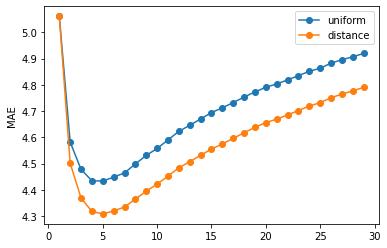

In [25]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 10, shuffle = False) #


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train_ss):
          # División train test aleatoria
          f_train = train_ss.loc[train_fold]
          f_test = train_ss.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(["playResult"],axis=1), y = f_train['playResult'])
          y_pred = knn.predict(X = f_test.drop(['playResult'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['playResult'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 



In [30]:
# constructor
n_neighbors = 5
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
mae = mean_absolute_error(y_test,y_pred)
print ('MAE', mae)

MAE 4.471215351812367


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



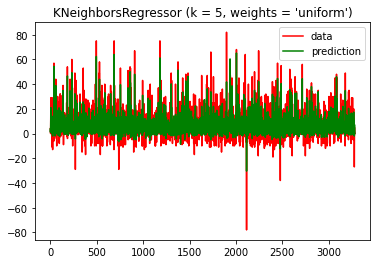

In [31]:

from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

###Decision Trees

In [15]:
train_ss = pd.DataFrame(X_pca_ss)
train_ss["playResult"] = static_defenses_ss["playResult"].values
train_ss.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,playResult
0,-0.396374,-2.604196,0.511574,1.714957,2.202969,-0.133858,-1.044103,2.192383,1.433238,1.207713,-4.075104,1.754243,-0.517785,-0.439379,0.778580,10
1,0.295969,-1.898373,1.487177,-0.398665,-0.552337,0.666972,-1.798160,0.518570,0.224760,-0.261385,0.703639,-0.282591,-0.702962,-0.294597,0.403608,0
2,2.586521,-2.429115,-3.134078,1.738755,0.517960,-0.483028,-0.284107,-0.057872,-1.514551,3.690861,0.702641,-0.765926,-0.641749,0.223201,-0.332728,0
3,-1.687388,-1.654410,2.744361,-1.685977,0.497758,-0.962232,-0.189729,1.023768,-1.200154,-0.718851,-0.172265,-0.225756,2.075557,-1.331639,0.907977,33
4,-1.973855,0.874506,0.722527,-0.828702,1.973372,-1.905813,-0.666198,0.803166,-0.922917,-0.163467,-0.542989,0.306032,-0.111152,0.675782,-0.787160,4


No handles with labels found to put in legend.


Min Value  :0.8306929773043136 (28)


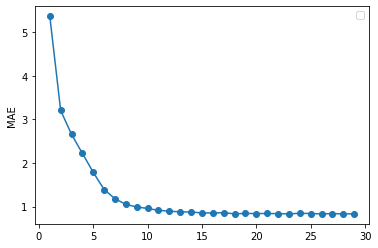

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False) #
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


total_scores = []
for i in range(1,30):
    fold_accuracy = []
    dt = DecisionTreeRegressor(max_depth=i)
    # verificar cada uno de los modelos con validación cruzada.
    for train_fold, test_fold in cv.split(train_ss):
      # División train test aleatoria
      f_train = train_ss.loc[train_fold]
      f_test = train_ss.loc[test_fold]
      # entrenamiento y ejecución del modelo
      dt.fit( X = f_train.drop(['playResult'], axis=1), 
                            y = f_train['playResult'])
      y_pred = dt.predict(X = f_test.drop(['playResult'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['playResult'], y_pred)
      fold_accuracy.append(mae)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value  :' +  str(min(total_scores)) +' (' + str(np.argmin(total_scores) + 1) + ')')
plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_ss.drop(["playResult"],axis=1),train_ss["playResult"],test_size=0.2)

In [21]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit( X = X_train, y = y_train)
y_pred = regressor.predict(X = X_test)
mae = mean_absolute_error(y_test, y_pred)
print ('MAE', mae)


MAE 1.746255887201665


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



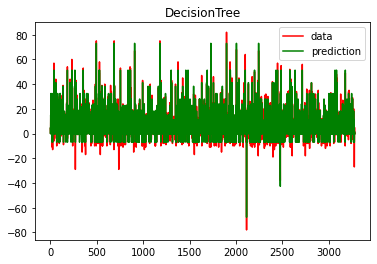

In [22]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree")

plt.show()

###RandomForest

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train_ss.drop(["playResult"],axis=1),train_ss["playResult"],test_size=0.2)

In [33]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 100, max_depth = 10, criterion='mae', random_state=0)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure ",  mae)

Error Measure  1.2536902223575999


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



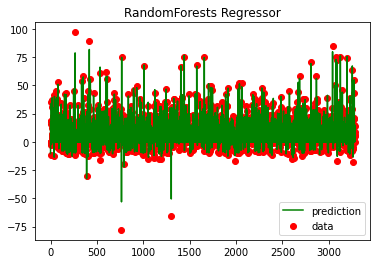

In [34]:
#plt.subplot(2, 1, i + 1)
# x axis for plotting
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

##Sin incluir cluster en el pca (aparte)